In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


2023-09-19 18:16:50.575744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 18:16:50.617351: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 18:16:50.618357: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 18:16:51.419011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# import the dataset into train and test datasets from keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
len(X_test)

10000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

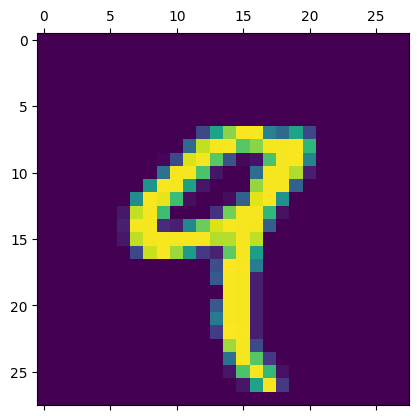

In [9]:
# shows the sample data in the location 4 of the training dataset
plt.matshow(X_train[4])

In [10]:
#from mymodule import X_train_reshape
# we need ti feed that into the neural network
# For this we need a single diemtional array
# So we need to flatten the array using reshape - the first is the length of the array and the second element displays 
# the pixels into which the image is divided 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape


(10000, 784)

In [11]:
# here we will build the mode by using sequential
# We will use Dense meaning that ever neuron is connected to the other neuron in the next layer
# we will use Sigmoid function as the output neurons (10 in number) are the next layer.
# these output 10 neurons will be activated depending on the output of the previous layer in our case it is the input layer, activation
# function used, number of inputs
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq = 1)

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# we will fit the modela with the train data and define the number of epochs
# check the accuracy on the traing data 
model.fit(X_train_flattened, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5


2023-09-19 18:16:54.069117: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4772 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9253


In [12]:
# here we will evalute our model using the test data
model.evaluate(X_test_flattened, y_test)


 54/313 [====>.........................] - ETA: 0s - loss: 0.3290 - accuracy: 0.9034 

2023-09-19 18:17:06.515794: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 889us/step - loss: 0.2742 - accuracy: 0.9209


[0.2741670310497284, 0.9208999872207642]

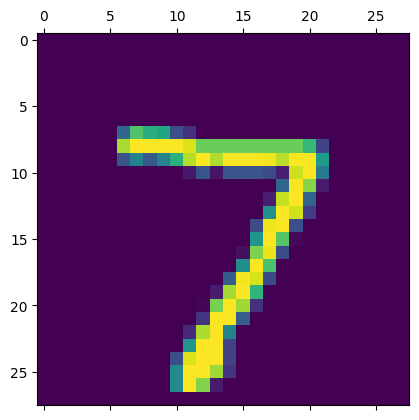

In [13]:
# plot the data in the test set
plt.matshow(X_test[0])

In [14]:
# predict the number using the test data
y_predict = model.predict(X_test_flattened)

140/313 [============>.................] - ETA: 0s

2023-09-19 18:17:07.232294: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 778us/step


In [15]:
# print all the predicted values
y_predict

array([[2.3908451e-02, 4.9512670e-07, 5.1498752e-02, ..., 9.9984699e-01,
        8.9779831e-02, 6.3463289e-01],
       [4.7213808e-01, 7.8122211e-03, 9.9933219e-01, ..., 1.6634053e-12,
        1.2486130e-01, 1.7906964e-09],
       [3.8501321e-04, 9.9309522e-01, 5.8392054e-01, ..., 1.7297481e-01,
        3.6060911e-01, 4.2462848e-02],
       ...,
       [5.8413498e-06, 9.0973945e-06, 1.2150244e-03, ..., 3.2842359e-01,
        5.4702252e-01, 7.9813510e-01],
       [1.1473178e-04, 1.7785585e-04, 7.5381009e-05, ..., 5.0419869e-05,
        6.6267335e-01, 6.5454151e-05],
       [2.5939088e-02, 1.1869579e-09, 1.1436343e-01, ..., 5.0869779e-08,
        1.4849854e-04, 4.4714545e-07]], dtype=float32)

In [16]:
# predict for a particular value in the data set - in this case the first value
# it will output 10 values and we need to find the max value in the ten output values
y_predict[0]

array([2.3908451e-02, 4.9512670e-07, 5.1498752e-02, 9.6645862e-01,
       3.3473151e-03, 1.1259736e-01, 1.9952433e-06, 9.9984699e-01,
       8.9779831e-02, 6.3463289e-01], dtype=float32)

In [17]:
# using argmax find the max value and that willl be the value that is predicted
np.argmax(y_predict[0])

7

In [18]:
# the below is done for the following reasons to get the confusion matrix
# the output of y_predict is an array with 10 values and the output of y_test is a number
# so we need to get a single value in y_predict also to plot confucion matrix
# so we will apply argmax for each value in y_predict (list comprehension)
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,   11,  903,   27,   14,    3,   12,   13,   38,    3],
       [   3,    0,   13,  940,    0,   18,    2,   12,   15,    7],
       [   2,    1,    2,    1,  922,    0,   11,    4,   10,   29],
       [  10,    3,    2,   52,   11,  759,   14,    8,   27,    6],
       [  13,    3,    5,    1,    7,   11,  915,    2,    1,    0],
       [   1,    6,   18,   10,    9,    0,    0,  957,    3,   24],
       [   9,   11,    6,   40,    9,   32,    9,   13,  836,    9],
       [  11,    7,    1,   13,   34,    8,    0,   33,    3,  899]],
      dtype=int32)>

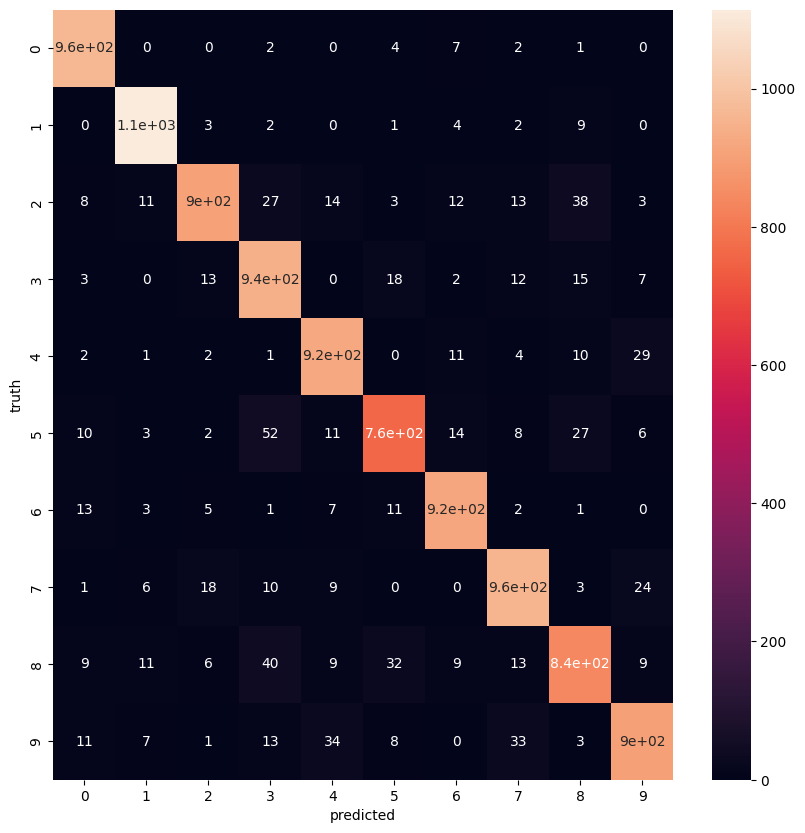

In [20]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [21]:
# here we will add a hidden layer to improve the accuracy
# we will add a hidden layer and we use for the hidden layer, activation fucntion 'relu'
# we will use randomly 100 as the neurons which should be less then the number of input values
# this is a trial and error method
# the last layer does not need to have the number of inputs as it will be able to figure out the number of inputs from the previous layer
# input shape 
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# we will fit the modela with the train data and define the number of epochs
# check the accuracy on the traing data 
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5


2023-09-19 18:17:09.080545: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1218 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0507 - accuracy: 0.9844


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9753


[0.07977424561977386, 0.9753000140190125]

In [23]:
# instead if flattening the array, we can use keras to flatten the input as beloe
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# we will fit the modela with the train data and define the number of epochs
# check the accuracy on the traing data 
model.fit(X_train, y_train, epochs = 5)
model.evaluate(X_test, y_test)


Epoch 1/5


2023-09-19 18:17:28.761556: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1218 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9805
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9765


[0.07791261374950409, 0.9764999747276306]

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


313/313 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9765
Loss: 0.07791261374950409
Accuracy: 0.9764999747276306
